In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

## Загружаем данные

In [ ]:
!wget !wget https://github.com/SichYeah/Metall_Dataset_test/archive/master.zip -O master.zip

--2022-07-10 13:19:08--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2022-07-10 13:19:09--  https://github.com/SichYeah/Metall_Dataset_test/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/SichYeah/Metall_Dataset_test/zip/main [following]
--2022-07-10 13:19:09--  https://codeload.github.com/SichYeah/Metall_Dataset_test/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ]   2.37M  12.7MB/s    in 0.2s    

2022-07-10 13:19:09 (12.7 MB/s) - ‘master.zip’ saved [2481330]



In [ ]:
!unzip master.zip

Archive:  master.zip
a0014da367e94b2e50cda0cf885552350a87a589
   creating: Metall_Dataset_test-main/
   creating: Metall_Dataset_test-main/Test/
   creating: Metall_Dataset_test-main/Test/defect/
  inflating: Metall_Dataset_test-main/Test/defect/11 советов_ как избавиться от ржавчины на металле_y.jpg  
  inflating: Metall_Dataset_test-main/Test/defect/8 бытовых продуктов_ которые могут очистить ржавчину_yythk.jpg  
  inflating: Metall_Dataset_test-main/Test/defect/Free Белый металл ржавчина 1 Stock Photo _ F.jpg  
  inflating: Metall_Dataset_test-main/Test/defect/Texture Rusty metal Surface painted Paint cracked B.jpg  
  inflating: Metall_Dataset_test-main/Test/defect/Арт ржавчины металла текстура фон. _174726550 - Лар.jpg  
  inflating: Metall_Dataset_test-main/Test/defect/Атмосферная коррозия_ виды_ особенности_ защита от коррози.jpg  
  inflating: Metall_Dataset_test-main/Test/defect/Бесплатная текстура металла с ржавчиной и краской.jpg  
  inflating: Metall_Dataset_test-main/Test/

## Создаем Tensorflow Dataset'ы

In [ ]:
batch_size=256
image_size=(100, 100)

**Набор данных для обучения**

In [ ]:
train_dataset = image_dataset_from_directory('Metall_Dataset_test-main/Training',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 415 files belonging to 2 classes.
Using 374 files for training.


**Проверочный набор данных**

In [ ]:
validation_dataset = image_dataset_from_directory('Metall_Dataset_test-main/Training',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 415 files belonging to 2 classes.
Using 41 files for validation.


Названия классов в наборах данных.

In [ ]:
class_names = train_dataset.class_names
class_names

['defect', 'good']

**Примеры изображений**

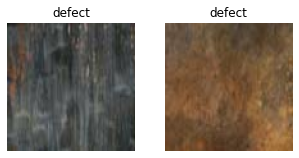

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Набор данных для тестирования**

In [ ]:
test_dataset = image_dataset_from_directory('Metall_Dataset_test-main/Test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 60 files belonging to 2 classes.


In [ ]:
test_dataset.class_names

['defect', 'good']

## Настраиваем производительность TensorFlow DataSet'ов

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Создаем нейронную сеть

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same',
                 input_shape=(100, 100, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 131 нейрон по количеству классов
model.add(Dense(131, activation='softmax'))

**Компилируем модель**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=10,
                    verbose=2)

Epoch 1/10
2/2 - 14s - loss: 33.7940 - accuracy: 0.2166 - val_loss: 13.2342 - val_accuracy: 0.2927 - 14s/epoch - 7s/step
Epoch 2/10
2/2 - 0s - loss: 8.7155 - accuracy: 0.4332 - val_loss: 0.7221 - val_accuracy: 0.7073 - 315ms/epoch - 158ms/step
Epoch 3/10
2/2 - 0s - loss: 0.8584 - accuracy: 0.7406 - val_loss: 0.5964 - val_accuracy: 0.6829 - 309ms/epoch - 155ms/step
Epoch 4/10
2/2 - 0s - loss: 0.6609 - accuracy: 0.7193 - val_loss: 0.3358 - val_accuracy: 0.7073 - 291ms/epoch - 145ms/step
Epoch 5/10
2/2 - 0s - loss: 0.5572 - accuracy: 0.7460 - val_loss: 0.2758 - val_accuracy: 0.9756 - 282ms/epoch - 141ms/step
Epoch 6/10
2/2 - 0s - loss: 0.4185 - accuracy: 0.8422 - val_loss: 0.2584 - val_accuracy: 0.9756 - 272ms/epoch - 136ms/step
Epoch 7/10
2/2 - 0s - loss: 0.3639 - accuracy: 0.8529 - val_loss: 0.2123 - val_accuracy: 0.9512 - 265ms/epoch - 133ms/step
Epoch 8/10
2/2 - 0s - loss: 0.3197 - accuracy: 0.8529 - val_loss: 0.4513 - val_accuracy: 0.7073 - 266ms/epoch - 133ms/step
Epoch 9/10
2/2 - 0

## Оцениваем качетсво обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)

1/1 [==============================] - 0s 146ms/step - loss: 0.3530 - accuracy: 0.9000


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 90.0


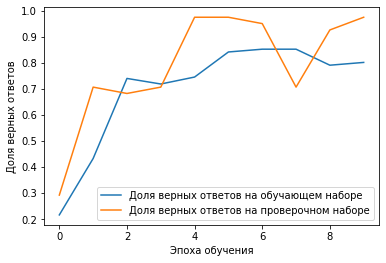

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

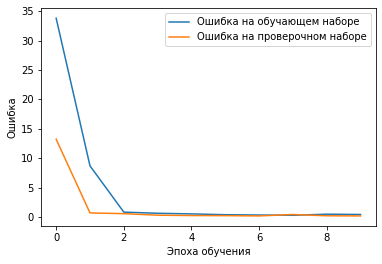

In [ ]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [ ]:
model.save("metal_model.h5")

Сохраняем модель на локальный компьютер

In [ ]:
files.download("metal_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>